<a href="https://colab.research.google.com/github/DocBot-Bangkit-2021/DocBot-MachineLearningModels/blob/main/Disease/Disease_Baseline_Model_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns

import os
import zipfile
import shutil

In [ ]:
plt.style.use('seaborn')

# **Data Loading**
[Dermnet](https://www.kaggle.com/shubhamgoel27/dermnet)

[skin disease image](https://www.kaggle.com/sanskar7447/skin-disease-image)

[Various Skin Diseases Dataset](https://www.kaggle.com/akshitmadan/various-skin-diseases-dataset)

This dataset contains 4 classes.

**Link for dataset in Google Drive**

https://drive.google.com/file/d/1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY/view?usp=sharing

https://www.kaggle.com/nurimammasri/diseases

In [ ]:
# Use this to download easily (only on google colab)
# !gdown --id 1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY

**Download dataset in Google Drive**

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1Eyhs_V7YYz6h-1ctzSoIo_nYehNsd_Vn/view?usp=sharing' # The shareable link

In [ ]:
# fluff, id = link.split('d/')
id = link.split('d/')[1].split('/view?')[0]
print (id)

1Eyhs_V7YYz6h-1ctzSoIo_nYehNsd_Vn


In [ ]:
downloaded = drive.CreateFile({'id':id})  #drive from PyDrive
downloaded.GetContentFile('diseases.zip')  

In [ ]:
file_zip = 'diseases.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('./diseases/')
zip_ref.close()

print(os.listdir('./diseases/'))

['conjunctivitis', 'nail_fungus', 'melanoma', 'cataracts']


In [ ]:
dir = './diseases/'
list_category = sorted(os.listdir(dir))
list_category

['cataracts', 'conjunctivitis', 'melanoma', 'nail_fungus']

# **Data Arrange**

In [ ]:
# make directory name for data training and validation (test) 
train_directory = os.path.join(dir, 'train')
validation_directory = os.path.join(dir, 'val')

# check if already exists
if not os.path.exists(train_directory) :
  os.mkdir(train_directory)

if not os.path.exists(validation_directory) :
  os.mkdir(validation_directory)

In [ ]:
# check a lot of data for :
# {'cataracts': 0, 'conjunctivitis': 1, 'melanoma': 2, 'nail_fungus': 3}
cataracts_dir = os.path.join(dir,'cataracts')
conjunctivitis_dir = os.path.join(dir, 'conjunctivitis')
melanoma_dir = os.path.join(dir, 'melanoma')
nail_fungus_dir = os.path.join(dir,'nail_fungus')

print("Cataracts :", len(os.listdir(cataracts_dir)))
print("Conjunctivitis :", len(os.listdir(conjunctivitis_dir))) 
print("Melanoma :", len(os.listdir(melanoma_dir)))
print("Nail Fungus :", len(os.listdir(nail_fungus_dir)))

Cataracts : 547
Conjunctivitis : 956
Melanoma : 506
Nail Fungus : 580


In [ ]:
from sklearn.model_selection import train_test_split
train_cataracts_dir, val_cataracts_dir = train_test_split(os.listdir(cataracts_dir), test_size = 0.2, random_state=43)
train_conjunctivitis_dir, val_conjunctivitis_dir = train_test_split(os.listdir(conjunctivitis_dir), test_size = 0.2, random_state=43)
train_melanoma_dir, val_melanoma_dir = train_test_split(os.listdir(melanoma_dir), test_size = 0.2, random_state=43)
train_nail_fungus_dir, val_nail_fungus_dir = train_test_split(os.listdir(nail_fungus_dir), test_size = 0.2, random_state=43)

In [ ]:
# spread dir data for train and test (validation)
datasets = [train_directory, validation_directory]

train_cataracts = os.path.join(train_directory, 'cataracts')
train_conjunctivitis = os.path.join(train_directory, 'conjunctivitis')
train_melanoma = os.path.join(train_directory, 'melanoma')
train_nail_fungus = os.path.join(train_directory, 'nail_fungus')

val_cataracts = os.path.join(validation_directory, 'cataracts')
val_conjunctivitis = os.path.join(validation_directory, 'conjunctivitis')
val_melanoma = os.path.join(validation_directory, 'melanoma')
val_nail_fungus = os.path.join(validation_directory, 'nail_fungus')

In [ ]:
train_sets = [train_cataracts, train_conjunctivitis, train_melanoma, train_nail_fungus]
for item in train_sets :
  if not os.path.exists(item):
    os.mkdir(item)

val_sets = [val_cataracts, val_conjunctivitis, val_melanoma, val_nail_fungus]
for item in val_sets :
  if not os.path.exists(item):
    os.mkdir(item)

In [ ]:
category_sets = [cataracts_dir, conjunctivitis_dir, melanoma_dir, nail_fungus_dir]
train_category_sets = [train_cataracts_dir, train_conjunctivitis_dir, train_melanoma_dir, train_nail_fungus_dir]
val_category_sets = [val_cataracts_dir, val_conjunctivitis_dir, val_melanoma_dir, val_nail_fungus_dir]

for i in range(len(category_sets)):
  for item in train_category_sets[i]:
    shutil.copy(os.path.join(category_sets[i], item), os.path.join(train_sets[i], item))

for i in range(len(category_sets)):
  for item in val_category_sets[i]:
    shutil.copy(os.path.join(category_sets[i], item), os.path.join(val_sets[i], item))

In [ ]:
for i, category in enumerate(train_sets):
  print('train ',list_category[i],' = ',len(os.listdir(category)))

for i, category in enumerate(val_sets):
  print('val ',list_category[i],' = ',len(os.listdir(category)))

train  cataracts  =  437
train  conjunctivitis  =  764
train  melanoma  =  404
train  nail_fungus  =  464
val  cataracts  =  110
val  conjunctivitis  =  192
val  melanoma  =  102
val  nail_fungus  =  116


**Split Folder**

In [ ]:
#!pip install split-folders
#import splitfolders

# membagi data menjadi 2 training dan validation, dengan rasio training 80% dan validation 20%
#splitfolders.ratio(path, '/content/data_result', seed=1337, ratio=(.8,.1,.1), group_prefix=None)
# or
# membagi data menjadi 2 training dan validation, dengan rasio training 80% dan validation 20%
# splitfolders.ratio('dataset', output="dataset-output", seed=42, ratio=(0.8,0.2), group_prefix=None)

# **Exploratory Data Analyis (EDA)**

In [ ]:
print(list_category)

['cataracts', 'conjunctivitis', 'melanoma', 'nail_fungus']


In [ ]:
# check a lot of data for paper, rock and scissors
for  item in list_category:
  class_dir = os.path.join(dir,item)
  print(item ," : ",len(os.listdir(class_dir)),"images")

cataracts  :  547 images
conjunctivitis  :  956 images
melanoma  :  506 images
nail_fungus  :  580 images


In [ ]:
# delete dir that is not used
# import shutil

# list_category = ['cataracts', 'conjunctivitis', 'melanoma', 'nail_fungus']

# for x in listdir_image:
#   if x not in list_category:
#     path = os.path.join(dir_image, x)
#     if os.path.isfile(path):
#         os.remove(path)
#     elif os.path.isdir(path):
#         shutil.rmtree(path)
#     else:
#         print("Unknown or already remove!")

# listdir_image = os.listdir(dir_image)
# listdir_image

In [ ]:
# check image (count, size, total)
from PIL import Image
total = 0

for x in list_category:
  dir_cat = os.path.join(dir, x)
  y = len(os.listdir(dir_cat))
  print(x+':', y)
  total = total + y
  
  size = (0,0)
  img_name = os.listdir(dir_cat)
  for i in range(5):
    img_path = os.path.join(dir_cat, img_name[i])
    img = Image.open(img_path)
    
    if size == img.size:
      continue
    else :
      size = img.size
      print('+ size = ',img.size)

print('\nTotal :', total)

cataracts: 547
+ size =  (493, 335)
+ size =  (310, 162)
+ size =  (480, 426)
+ size =  (317, 225)
+ size =  (444, 229)
conjunctivitis: 956
+ size =  (220, 177)
+ size =  (880, 492)
+ size =  (275, 183)
+ size =  (1020, 574)
+ size =  (678, 450)
melanoma: 506
+ size =  (720, 474)
+ size =  (720, 480)
+ size =  (720, 474)
+ size =  (720, 540)
+ size =  (231, 219)
nail_fungus: 580
+ size =  (720, 472)
+ size =  (465, 720)
+ size =  (720, 472)
+ size =  (1000, 622)
+ size =  (481, 720)

Total : 2589


cataracts


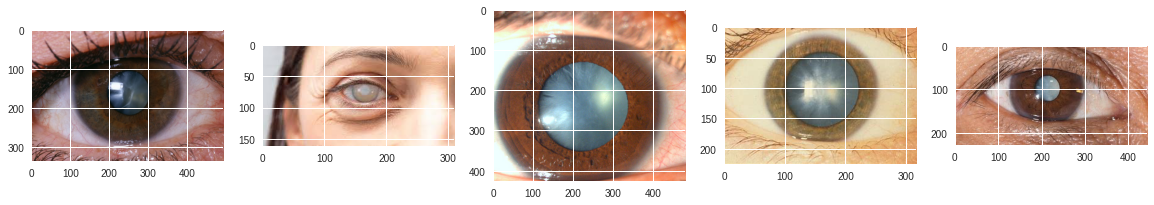

conjunctivitis


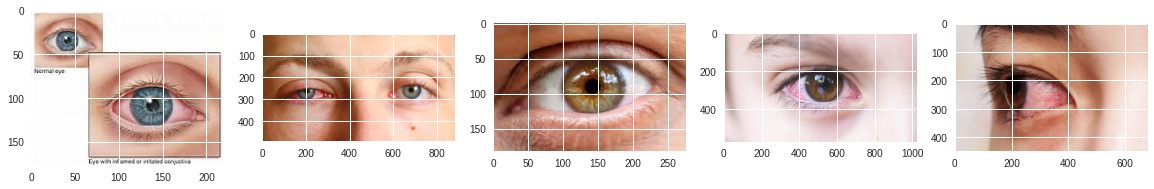

melanoma


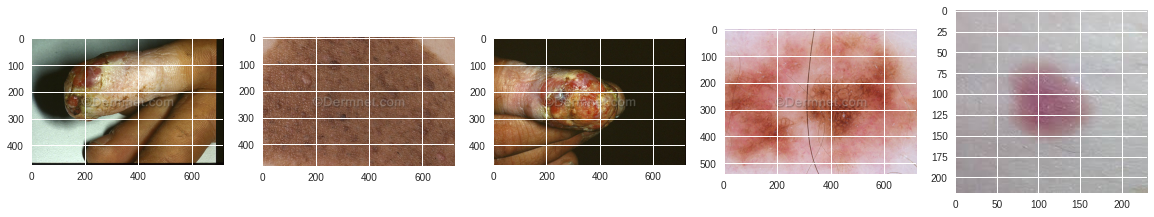

nail_fungus


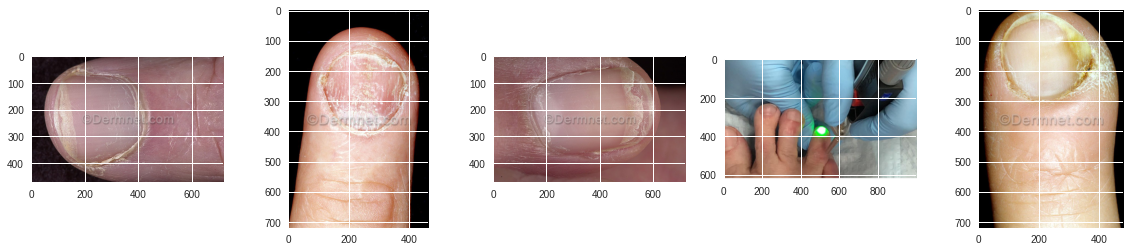

In [ ]:
# check images class
for  item in list_category:
  print(item)
  class_dir = os.path.join(dir,item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

# **Data Modeling 01**

## **Image Augmentation**

In [ ]:
# import library for Machine Learning
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

In [ ]:
# make imagedatagenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    zoom_range=0.2,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nearest')
val_datagen = ImageDataGenerator(rescale=1./255,)

In [ ]:
batch_size = 64
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size =(150,150),
    batch_size = batch_size,
    shuffle=True,
    class_mode = 'categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_directory,
    target_size = (150,150),
    batch_size = batch_size,
    shuffle=True,
    class_mode = 'categorical'
)

Found 1886 images belonging to 4 classes.
Found 481 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'cataracts': 0, 'conjunctivitis': 1, 'melanoma': 2, 'nail_fungus': 3}

In [ ]:
validation_generator.class_indices

{'cataracts': 0, 'conjunctivitis': 1, 'melanoma': 2, 'nail_fungus': 3}

In [ ]:
label_types = []
for category in train_generator.class_indices:
  label_types.append(category)
label_types

['cataracts', 'conjunctivitis', 'melanoma', 'nail_fungus']

## **Train Model 01**

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 4 class output neuron.
    tf.keras.layers.Dense(4, activation='softmax')  
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_2_v1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
29/29 [==============================] - 55s 778ms/step - loss: 1.9384 - accuracy: 0.3068 - val_loss: 1.3960 - val_accuracy: 0.3170

Epoch 00001: val_accuracy improved from -inf to 0.31696, saving model to best_model_2_v1.h5
Epoch 2/100
29/29 [==============================] - 22s 766ms/step - loss: 1.4268 - accuracy: 0.3518 - val_loss: 1.3388 - val_accuracy: 0.4263

Epoch 00002: val_accuracy improved from 0.31696 to 0.42634, saving model to best_model_2_v1.h5
Epoch 3/100
29/29 [==============================] - 21s 742ms/step - loss: 1.2920 - accuracy: 0.4111 - val_loss: 1.3305 - val_accuracy: 0.4062

Epoch 00003: val_accuracy did not improve from 0.42634
Epoch 4/100
29/29 [==============================] - 21s 741ms/step - loss: 1.2385 - accuracy: 0.4671 - val_loss: 1.1508 - val_accuracy: 0.5603

Epoch 00004: val_accuracy improved from 0.42634 to 0.56027, saving model to best_model_2_v1.h5
Epoch 5/100
29/29 [==============================] - 21s 726ms/step - loss: 1.2011 

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

8/8 [==============================] - 5s 575ms/step - loss: 0.6608 - accuracy: 0.7588
Accuracy (train):  0.7688229084014893
Accuracy: (test) 0.7588357329368591


### **Plot Model**

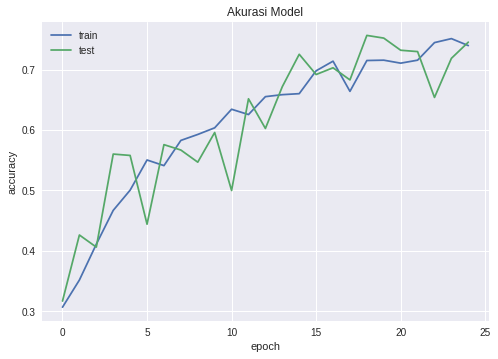

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

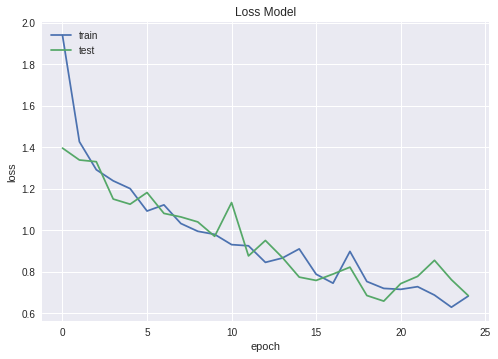

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

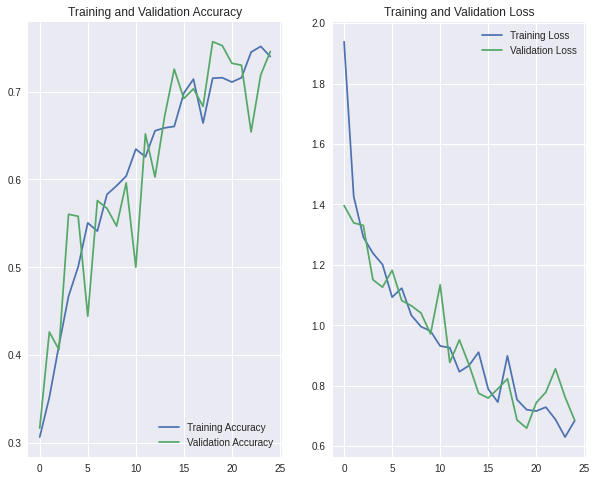

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving cataracts.jpg to cataracts.jpg
Cataracts


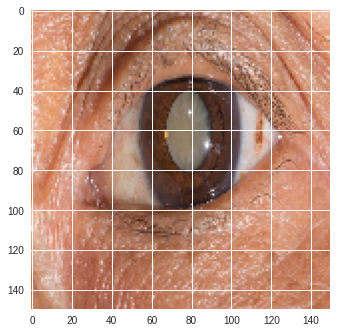

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[0.87357503, 0.08301868, 0.03673074, 0.0066755 ]], dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 232
drwxr-xr-x 2 root root   4096 Jun  4 10:59 assets
-rw-r--r-- 1 root root  22143 Jun  4 10:59 keras_metadata.pb
-rw-r--r-- 1 root root 203040 Jun  4 10:59 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 10:59 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_02_v1.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_02_v1.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_02_v1.tflite')
    files.download('diseases_02_v1.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_2_v1.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 232
drwxr-xr-x 2 root root   4096 Jun  4 10:59 assets
-rw-r--r-- 1 root root  22143 Jun  4 10:59 keras_metadata.pb
-rw-r--r-- 1 root root 201377 Jun  4 10:59 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 10:59 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_02_v1_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_02_v1_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_02_v1_best.tflite')
    files.download('diseases_02_v1_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 02**

In [ ]:
import tensorflow as tf
# from tensorflow.keras import applications, optimizers

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_2_v2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
29/29 [==============================] - 23s 736ms/step - loss: 1.3446 - accuracy: 0.3381 - val_loss: 1.3032 - val_accuracy: 0.3906

Epoch 00001: val_accuracy improved from -inf to 0.39062, saving model to best_model_2_v2.h5
Epoch 2/100
29/29 [==============================] - 21s 735ms/step - loss: 1.2325 - accuracy: 0.4435 - val_loss: 1.1701 - val_accuracy: 0.5045

Epoch 00002: val_accuracy improved from 0.39062 to 0.50446, saving model to best_model_2_v2.h5
Epoch 3/100
29/29 [==============================] - 21s 738ms/step - loss: 1.1087 - accuracy: 0.5285 - val_loss: 1.0706 - val_accuracy: 0.5737

Epoch 00003: val_accuracy improved from 0.50446 to 0.57366, saving model to best_model_2_v2.h5
Epoch 4/100
29/29 [==============================] - 21s 737ms/step - loss: 1.0147 - accuracy: 0.5977 - val_loss: 1.2194 - val_accuracy: 0.5112

Epoch 00004: val_accuracy did not improve from 0.57366
Epoch 5/100
29/29 [==============================] - 21s 743ms/step - loss: 1.0571 

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

8/8 [==============================] - 5s 572ms/step - loss: 0.4689 - accuracy: 0.8420
Accuracy (train):  0.8727465271949768
Accuracy: (test) 0.8419958353042603


### **Plot Model**

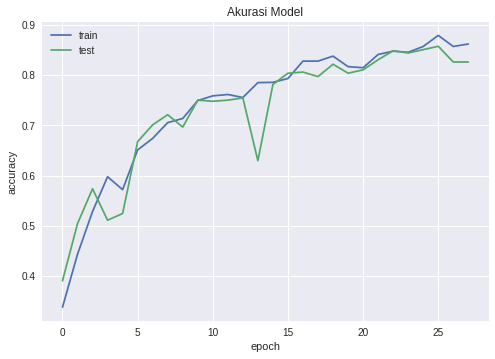

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

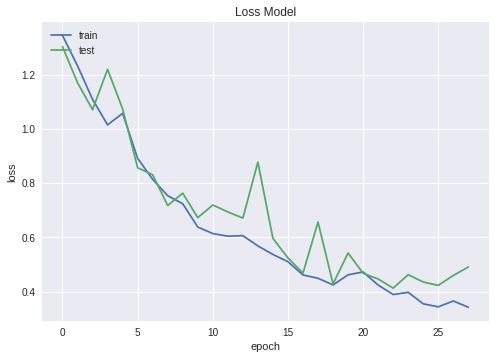

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

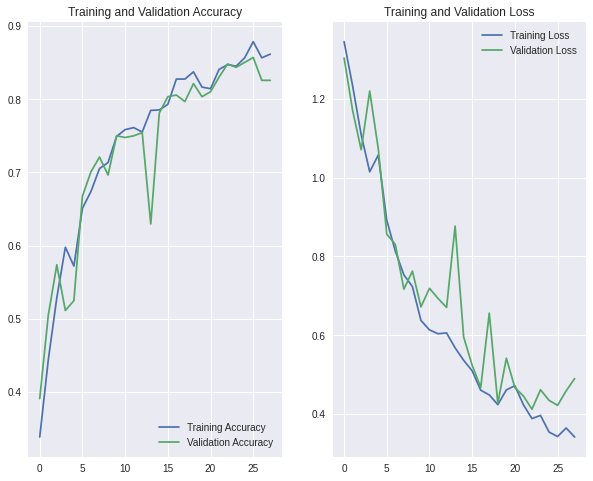

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving conjungtivitis.jpg to conjungtivitis.jpg
Conjunctivitis


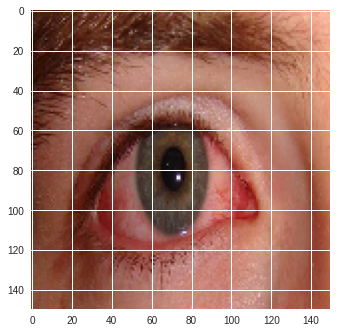

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[7.6603965e-06, 9.9997783e-01, 1.4570591e-05, 1.8322863e-08]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 244
drwxr-xr-x 2 root root   4096 Jun  4 11:19 assets
-rw-r--r-- 1 root root  23532 Jun  4 11:19 keras_metadata.pb
-rw-r--r-- 1 root root 215869 Jun  4 11:19 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 11:19 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_02_v2.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_02_v2.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_02_v2.tflite')
    files.download('diseases_02_v2.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**


In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_2_v2.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 244
drwxr-xr-x 2 root root   4096 Jun  4 11:19 assets
-rw-r--r-- 1 root root  23532 Jun  4 11:19 keras_metadata.pb
-rw-r--r-- 1 root root 214109 Jun  4 11:19 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 11:19 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_02_v2_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_02_v2_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_02_v2_best.tflite')
    files.download('diseases_02_v2_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 03**

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 4 class output neuron.
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)       

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_2_v3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(train_generator,
#                               validation_data=validation_generator,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
29/29 [==============================] - 23s 753ms/step - loss: 1.4120 - accuracy: 0.3156 - val_loss: 1.3586 - val_accuracy: 0.3214

Epoch 00001: val_accuracy improved from -inf to 0.32143, saving model to best_model_2_v3.h5
Epoch 2/100
29/29 [==============================] - 21s 734ms/step - loss: 1.3464 - accuracy: 0.3600 - val_loss: 1.2654 - val_accuracy: 0.5268

Epoch 00002: val_accuracy improved from 0.32143 to 0.52679, saving model to best_model_2_v3.h5
Epoch 3/100
29/29 [==============================] - 21s 739ms/step - loss: 1.2728 - accuracy: 0.4583 - val_loss: 1.1356 - val_accuracy: 0.4955

Epoch 00003: val_accuracy did not improve from 0.52679
Epoch 4/100
29/29 [==============================] - 21s 736ms/step - loss: 1.2141 - accuracy: 0.4967 - val_loss: 1.1990 - val_accuracy: 0.4554

Epoch 00004: val_accuracy did not improve from 0.52679
Epoch 5/100
29/29 [==============================] - 21s 731ms/step - loss: 1.1030 - accuracy: 0.5280 - val_loss: 1.1528 - 

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

8/8 [==============================] - 4s 573ms/step - loss: 0.4154 - accuracy: 0.8378
Accuracy (train):  0.8722163438796997
Accuracy: (test) 0.837837815284729


### **Plot Model**

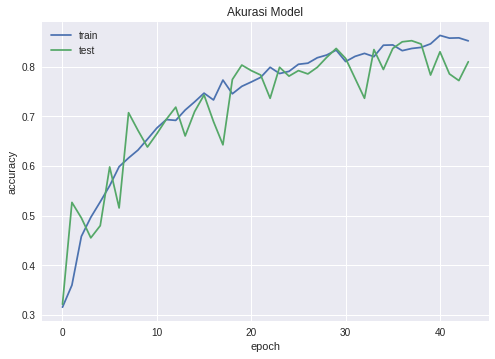

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

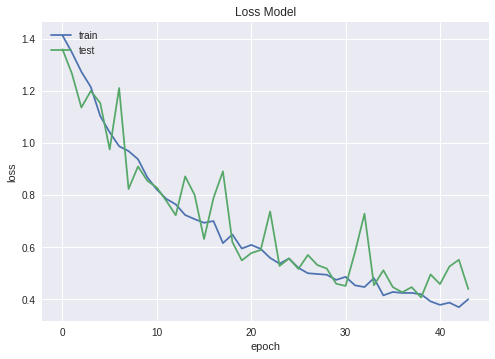

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

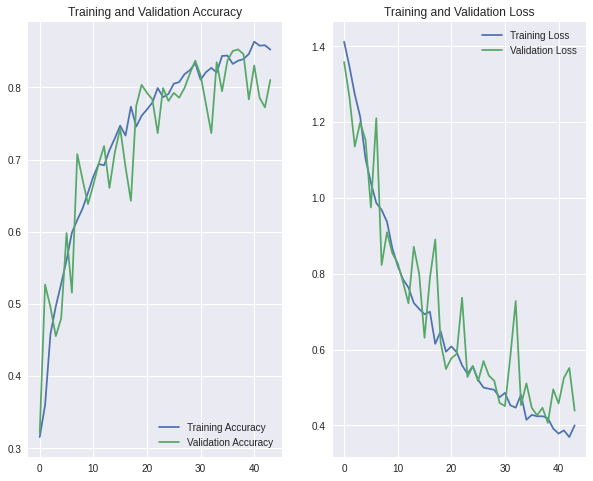

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving download.jpg to download.jpg
Conjunctivitis


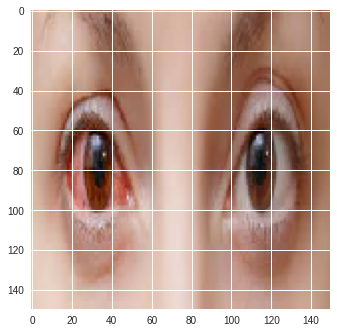

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[9.1861703e-02, 9.0720814e-01, 7.9177803e-04, 1.3834695e-04]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 252
drwxr-xr-x 2 root root   4096 Jun  4 11:50 assets
-rw-r--r-- 1 root root  26746 Jun  4 11:50 keras_metadata.pb
-rw-r--r-- 1 root root 217445 Jun  4 11:50 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 11:50 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_02_v3.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_02_v3.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_02_v3.tflite')
    files.download('diseases_02_v3.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_2_v3.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 248
drwxr-xr-x 2 root root   4096 Jun  4 11:50 assets
-rw-r--r-- 1 root root  26746 Jun  4 11:50 keras_metadata.pb
-rw-r--r-- 1 root root 215582 Jun  4 11:50 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 11:50 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_02_v3_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_02_v3_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_02_v3_best.tflite')
    files.download('diseases_02_v3_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 04**

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')  
])
model.layers[0].trainable = False

234553344/234545216 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 5, 5, 2048)        58331648  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 1028      
Total params: 84,678,916
Trainable params: 26,347,268
Non-trainable params: 58,331,648
_________________________________

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_2_v4.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(train_generator,
#                               validation_data=validation_generator,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
29/29 [==============================] - 35s 899ms/step - loss: 9.2412 - accuracy: 0.6954 - val_loss: 0.9863 - val_accuracy: 0.8304

Epoch 00001: val_accuracy improved from -inf to 0.83036, saving model to best_model_2_v4.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
29/29 [==============================] - 24s 814ms/step - loss: 1.5160 - accuracy: 0.7925 - val_loss: 1.4429 - val_accuracy: 0.8415

Epoch 00002: val_accuracy improved from 0.83036 to 0.84152, saving model to best_model_2_v4.h5
Epoch 3/100
29/29 [==============================] - 24s 820ms/step - loss: 1.0856 - accuracy: 0.8178 - val_loss: 0.8373 - val_accuracy: 0.8348

Epoch 00003: val_accuracy did not improve from 0.84152
Epoch 4/100
29/29 [==============================] - 24s 777ms/step - loss: 0.7065 - accuracy: 0.8310 - val_loss: 0.4612 - val_accuracy: 0.8772

Epoch 00004: val_accuracy improved from 0.84152 to 0.87723, saving model to best_model_2_v4.h5
Epoch 5/100
29/29 [==============================] - 23s 812ms/step - loss: 0.5913 - accuracy: 0.8370 - val_loss: 0.4118 - val_accuracy: 0.8750

Epoch 00005: val_accuracy did not improve from 0.87723
Epoch 6/100
29/29 [==============================] - 24s 812ms/step - loss: 0.5119 - accuracy: 0.8551 - val_loss: 0.3987

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

8/8 [==============================] - 6s 689ms/step - loss: 0.4102 - accuracy: 0.8690
Accuracy (train):  0.8833510279655457
Accuracy: (test) 0.8690228462219238


### **Plot Model**

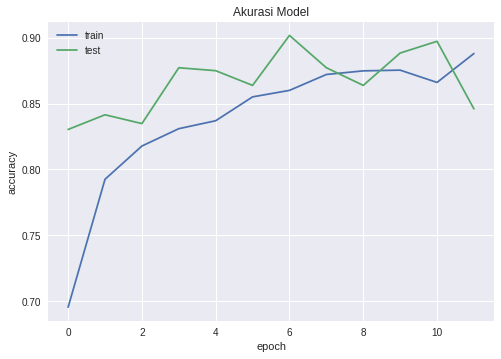

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

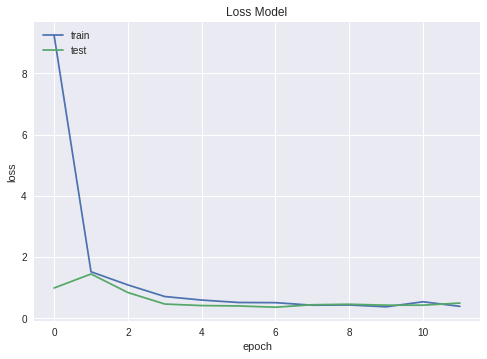

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

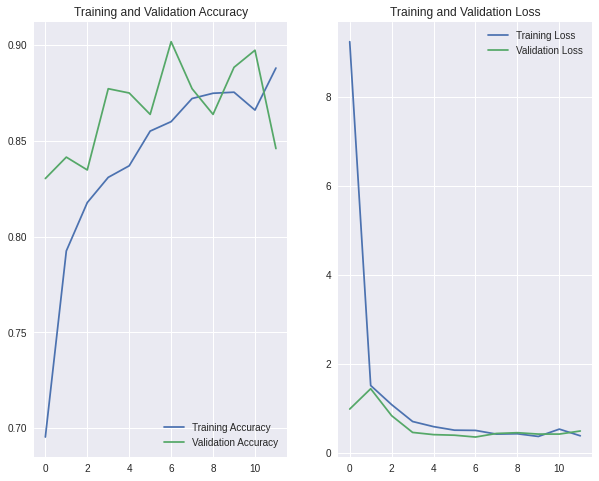

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving melanoma.jpg to melanoma.jpg
Melanoma


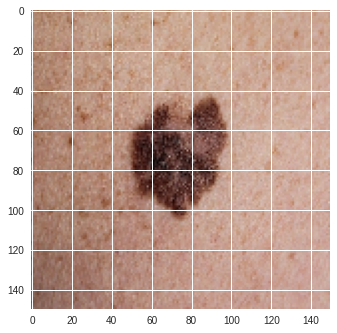

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[0., 0., 1., 0.]], dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 15188
drwxr-xr-x 2 root root     4096 Jun  4 12:10 assets
-rw-r--r-- 1 root root  1735735 Jun  4 12:10 keras_metadata.pb
-rw-r--r-- 1 root root 13807039 Jun  4 12:10 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  4 12:10 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_02_v4.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_02_v4.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_02_v4.tflite')
    files.download('diseases_02_v4.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_2_v4.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 15192
drwxr-xr-x 2 root root     4096 Jun  4 12:12 assets
-rw-r--r-- 1 root root  1735734 Jun  4 12:12 keras_metadata.pb
-rw-r--r-- 1 root root 13807976 Jun  4 12:12 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  4 12:12 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_02_v4_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_02_v4_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_02_v4_best.tflite')
    files.download('diseases_02_v4_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 05**

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121

model = tf.keras.Sequential([
    DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=(150, 150, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(4, activation='softmax')
])

29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 4, 4, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)              

In [ ]:
do_fine_tuning = True #@param {type:"boolean"}

if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.99)
else:
    optimizer = "adam"

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_2_v5.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
29/29 [==============================] - 46s 1s/step - loss: 1.2992 - accuracy: 0.5220 - val_loss: 1.5681 - val_accuracy: 0.4621

Epoch 00001: val_accuracy improved from -inf to 0.46205, saving model to best_model_2_v5.h5
Epoch 2/100
29/29 [==============================] - 25s 852ms/step - loss: 0.4500 - accuracy: 0.8578 - val_loss: 3.2747 - val_accuracy: 0.5156

Epoch 00002: val_accuracy improved from 0.46205 to 0.51562, saving model to best_model_2_v5.h5
Epoch 3/100
29/29 [==============================] - 25s 850ms/step - loss: 0.3613 - accuracy: 0.8880 - val_loss: 9.3801 - val_accuracy: 0.3058

Epoch 00003: val_accuracy did not improve from 0.51562
Epoch 4/100
29/29 [==============================] - 25s 840ms/step - loss: 0.3197 - accuracy: 0.8880 - val_loss: 4.1471 - val_accuracy: 0.3281

Epoch 00004: val_accuracy did not improve from 0.51562
Epoch 5/100
29/29 [==============================] - 25s 848ms/step - loss: 0.3176 - accuracy: 0.8996 - val_loss: 6.2040 - val

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

8/8 [==============================] - 6s 752ms/step - loss: 14.5608 - accuracy: 0.3950
Accuracy (train):  0.4034994840621948
Accuracy: (test) 0.395010381937027


### **Plot Model**

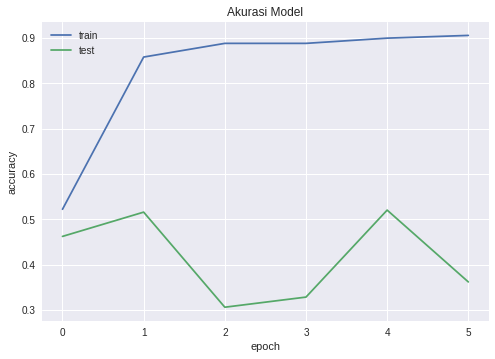

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

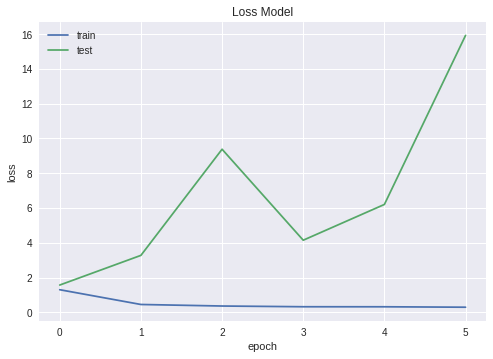

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

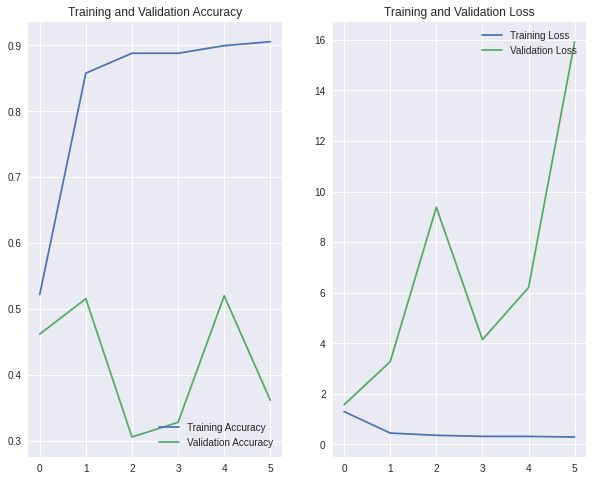

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving nail funggus.jpg to nail funggus.jpg
Nail Fungus


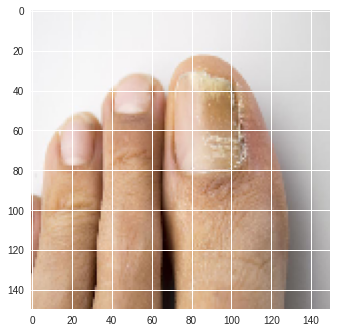

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[0.000000e+00, 0.000000e+00, 7.952538e-28, 1.000000e+00]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 12564
drwxr-xr-x 2 root root     4096 Jun  4 12:19 assets
-rw-r--r-- 1 root root  1308111 Jun  4 12:19 keras_metadata.pb
-rw-r--r-- 1 root root 11545312 Jun  4 12:19 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  4 12:19 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_02_v5.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_02_v5.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_02_v5.tflite')
    files.download('diseases_02_v5.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_2_v5.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 12548
drwxr-xr-x 2 root root     4096 Jun  4 12:21 assets
-rw-r--r-- 1 root root  1308111 Jun  4 12:21 keras_metadata.pb
-rw-r--r-- 1 root root 11527438 Jun  4 12:21 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  4 12:21 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_02_v5_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_02_v5_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_02_v5_best.tflite')
    files.download('diseases_02_v5_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 06**

In [ ]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-06-04 12:21:52--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  93.4MB/s    in 0.9s    

2021-06-04 12:21:53 (93.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(local_weights_file)

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(4, activation='softmax')(x) 

model = tf.keras.Model(pre_trained_model.input, x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# Fine Tuning
NUM_LAYERS = 10 #@param {type:"slider", min:1, max:50, step:1}
do_fine_tuning = True #@param {type:"boolean"}

if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.99)
    
    for layer in model.layers[-NUM_LAYERS:]:
        layer.trainable = True

    # Make all the layers in the pre-trained model trainable
    for layer in pre_trained_model.layers:
        layer.trainable = True
else:
    optimizer = 'adam'

    # Make all the layers in the pre-trained model non-trainable
    for layer in pre_trained_model.layers:
        layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_2_v6.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
29/29 [==============================] - 31s 858ms/step - loss: 0.8626 - accuracy: 0.6454 - val_loss: 0.8199 - val_accuracy: 0.7746

Epoch 00001: val_accuracy improved from -inf to 0.77455, saving model to best_model_2_v6.h5
Epoch 2/100
29/29 [==============================] - 23s 786ms/step - loss: 0.3515 - accuracy: 0.8842 - val_loss: 0.7201 - val_accuracy: 0.8304

Epoch 00002: val_accuracy improved from 0.77455 to 0.83036, saving model to best_model_2_v6.h5
Epoch 3/100
29/29 [==============================] - 23s 785ms/step - loss: 0.2390 - accuracy: 0.9308 - val_loss: 0.7990 - val_accuracy: 0.8527

Epoch 00003: val_accuracy improved from 0.83036 to 0.85268, saving model to best_model_2_v6.h5
Epoch 4/100
29/29 [==============================] - 23s 791ms/step - loss: 0.2141 - accuracy: 0.9380 - val_loss: 0.4190 - val_accuracy: 0.8839

Epoch 00004: val_accuracy improved from 0.85268 to 0.88393, saving model to best_model_2_v6.h5
Epoch 5/100
29/29 [========================

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

8/8 [==============================] - 5s 647ms/step - loss: 0.5611 - accuracy: 0.8898
Accuracy (train):  0.9093319177627563
Accuracy: (test) 0.8898128867149353


### **Plot Model**

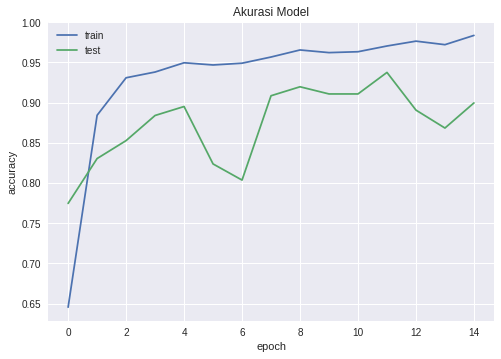

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

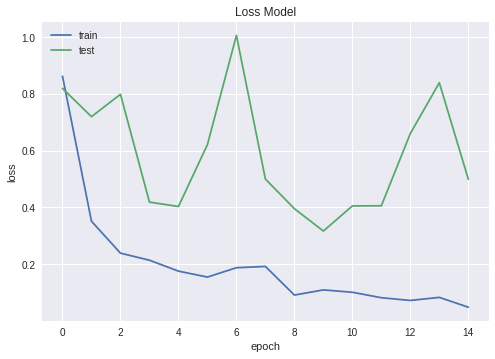

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

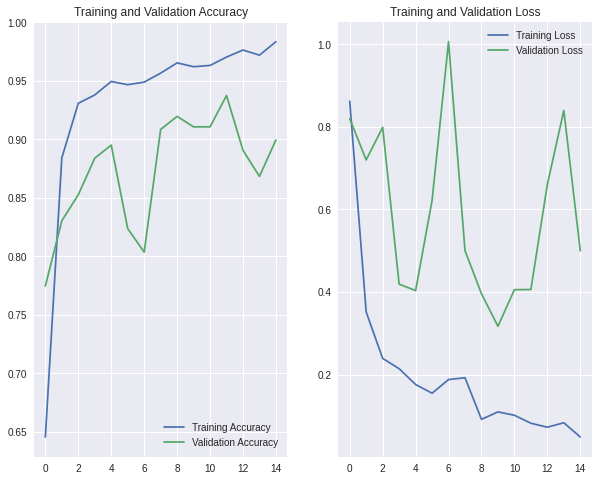

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving cataracts.jpg to cataracts (1).jpg
Cataracts


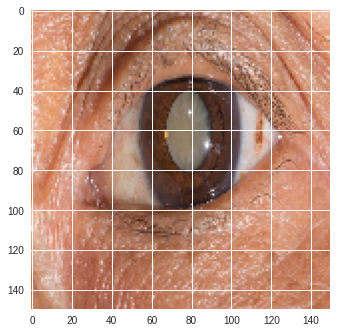

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[9.9967432e-01, 3.2525702e-04, 3.8947195e-07, 4.2564483e-08]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 5380
drwxr-xr-x 2 root root    4096 Jun  4 12:33 assets
-rw-r--r-- 1 root root  480157 Jun  4 12:33 keras_metadata.pb
-rw-r--r-- 1 root root 5016571 Jun  4 12:33 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  4 12:33 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_02_v6.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_02_v6.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_02_v6.tflite')
    files.download('diseases_02_v6.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_2_v6.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 5380
drwxr-xr-x 2 root root    4096 Jun  4 12:34 assets
-rw-r--r-- 1 root root  480157 Jun  4 12:34 keras_metadata.pb
-rw-r--r-- 1 root root 5016804 Jun  4 12:34 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  4 12:34 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_02_v6_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_02_v6_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_02_v6_best.tflite')
    files.download('diseases_02_v6_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 07**

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import VGG19

model = tf.keras.models.Sequential([
    VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  
])
model.layers[0].trainable = False

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 1028      
Total params: 24,351,556
Trainable params: 4,327,172
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_2_v7.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(train_generator,
#                               validation_data=validation_generator,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
29/29 [==============================] - 32s 893ms/step - loss: 2.4578 - accuracy: 0.4885 - val_loss: 1.1332 - val_accuracy: 0.5737

Epoch 00001: val_accuracy improved from -inf to 0.57366, saving model to best_model_2_v7.h5
Epoch 2/100
29/29 [==============================] - 22s 756ms/step - loss: 0.7817 - accuracy: 0.6756 - val_loss: 0.5606 - val_accuracy: 0.7500

Epoch 00002: val_accuracy improved from 0.57366 to 0.75000, saving model to best_model_2_v7.h5
Epoch 3/100
29/29 [==============================] - 23s 791ms/step - loss: 0.6694 - accuracy: 0.7195 - val_loss: 0.6101 - val_accuracy: 0.7031

Epoch 00003: val_accuracy did not improve from 0.75000
Epoch 4/100
29/29 [==============================] - 23s 777ms/step - loss: 0.6494 - accuracy: 0.7409 - val_loss: 0.7297 - val_accuracy: 0.6897

Epoch 00004: val_accuracy did not improve from 0.75000
Epoch 5/100
29/29 [==============================] - 22s 772ms/step - loss: 0.5408 - accuracy: 0.7832 - val_loss: 0.5557 - 

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

8/8 [==============================] - 8s 994ms/step - loss: 0.4732 - accuracy: 0.8233
Accuracy (train):  0.8748674392700195
Accuracy: (test) 0.8232848048210144


### **Plot Model**

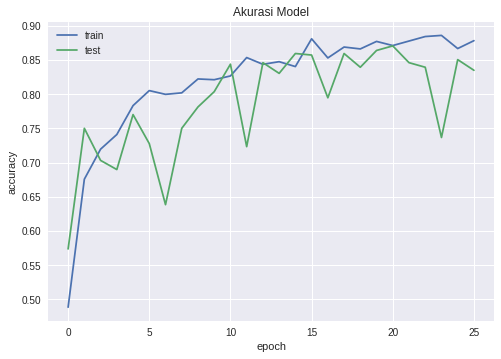

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

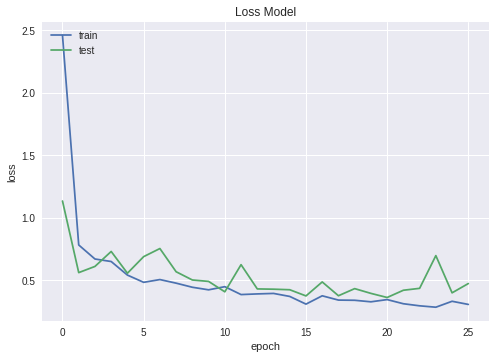

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

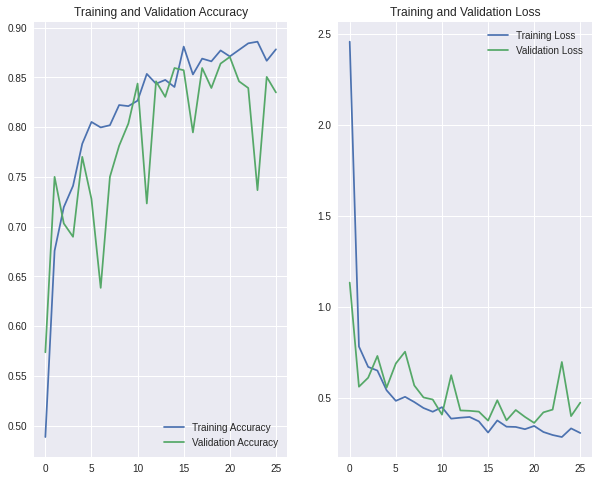

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving conjungtivitis.jpg to conjungtivitis (1).jpg
Conjunctivitis


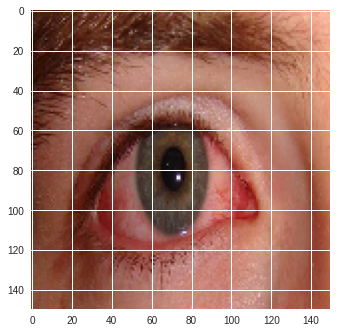

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[0.17074028, 0.82227516, 0.0045187 , 0.00246584]], dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 636
drwxr-xr-x 2 root root   4096 Jun  4 13:02 assets
-rw-r--r-- 1 root root  92593 Jun  4 13:02 keras_metadata.pb
-rw-r--r-- 1 root root 547921 Jun  4 13:02 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 13:02 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_02_v7.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_02_v7.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_02_v7.tflite')
    files.download('diseases_02_v7.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_2_v7.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 636
drwxr-xr-x 2 root root   4096 Jun  4 13:02 assets
-rw-r--r-- 1 root root  92592 Jun  4 13:02 keras_metadata.pb
-rw-r--r-- 1 root root 546846 Jun  4 13:02 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 13:02 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_02_v7_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_02_v7_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_02_v7_best.tflite')
    files.download('diseases_02_v7_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 08**

In [ ]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [ ]:
import tensorflow_hub as hub
do_fine_tuning = True #@param {type:"boolean"}

feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)

model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(len(list_category), activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 2,228,996
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(0.002, momentum=0.99)
    feature_extractor.trainable = True
else: 
    feature_extractor.trainable = False
    optimizer = "adam"

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_2_v8.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
batch_size = 128
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size =IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'categorical'
)

validation_generator = train_datagen.flow_from_directory(
    validation_directory,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 1886 images belonging to 4 classes.
Found 481 images belonging to 4 classes.


In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
14/14 [==============================] - 45s 3s/step - loss: 1.0057 - accuracy: 0.5973 - val_loss: 0.6817 - val_accuracy: 0.7760

Epoch 00001: val_accuracy improved from -inf to 0.77604, saving model to best_model_2_v8.h5
Epoch 2/100
14/14 [==============================] - 35s 3s/step - loss: 0.3447 - accuracy: 0.9135 - val_loss: 0.6164 - val_accuracy: 0.8932

Epoch 00002: val_accuracy improved from 0.77604 to 0.89323, saving model to best_model_2_v8.h5
Epoch 3/100
14/14 [==============================] - 35s 3s/step - loss: 0.2370 - accuracy: 0.9534 - val_loss: 0.8095 - val_accuracy: 0.8672

Epoch 00003: val_accuracy did not improve from 0.89323
Epoch 4/100
14/14 [==============================] - 35s 3s/step - loss: 0.2137 - accuracy: 0.9621 - val_loss: 0.9676 - val_accuracy: 0.8594

Epoch 00004: val_accuracy did not improve from 0.89323
Epoch 5/100
14/14 [==============================] - 35s 2s/step - loss: 0.1731 - accuracy: 0.9699 - val_loss: 0.8301 - val_accuracy: 0

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

4/4 [==============================] - 7s 2s/step - loss: 0.5774 - accuracy: 0.9148
Accuracy (train):  0.9294803738594055
Accuracy: (test) 0.9147608876228333


### **Plot Model**

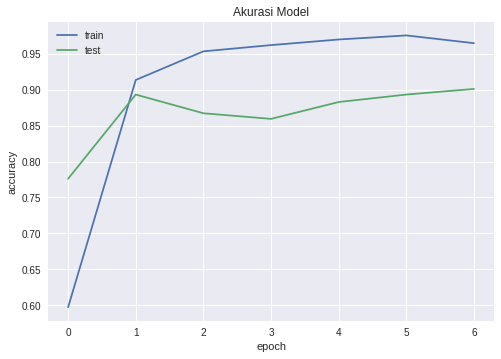

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

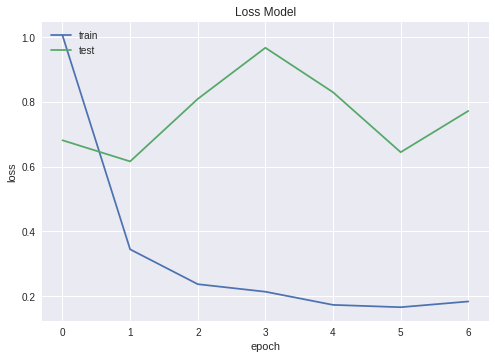

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

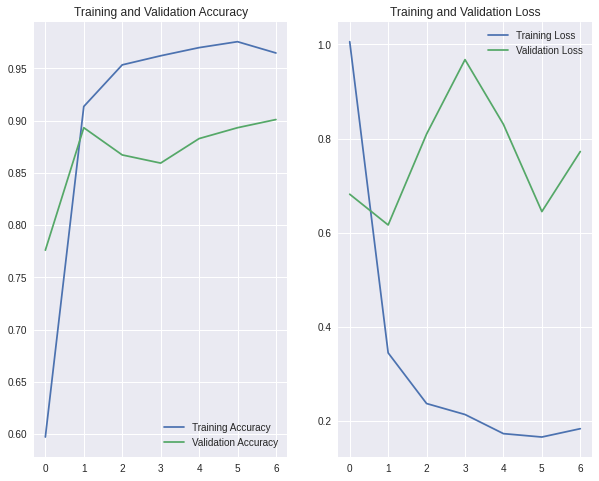

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving nail funggus.jpg to nail funggus (1).jpg
Nail Fungus


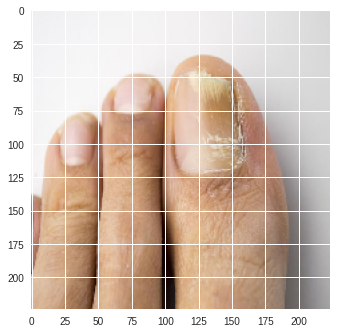

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=IMAGE_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[4.3985997e-09, 2.9421810e-15, 3.6699159e-08, 1.0000000e+00]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets


INFO:tensorflow:Assets written to: /tmp/1/assets



export_path = /tmp/1
total 2708
drwxr-xr-x 2 root root    4096 Jun  4 13:18 assets
-rw-r--r-- 1 root root    5228 Jun  4 13:18 keras_metadata.pb
-rw-r--r-- 1 root root 2754462 Jun  4 13:18 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  4 13:18 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_02_v8.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_02_v8.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_02_v8.tflite')
    files.download('diseases_02_v8.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_2_v8.h5', custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



INFO:tensorflow:Assets written to: /tmp/2/assets


INFO:tensorflow:Assets written to: /tmp/2/assets



export_path = /tmp/2
total 2032
drwxr-xr-x 2 root root    4096 Jun  4 13:18 assets
-rw-r--r-- 1 root root    3552 Jun  4 13:18 keras_metadata.pb
-rw-r--r-- 1 root root 2066182 Jun  4 13:18 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  4 13:18 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_02_v8_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_02_v8_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_02_v8_best.tflite')
    files.download('diseases_02_v8_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>